In [ ]:
import numpy as np                      # Importing Essential libraries

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy

import statistics as st

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/DS203/DATA FILES/master.csv"

'/content/drive/MyDrive/DS203/DATA FILES/master.csv'


## Reading a CSV file into a Dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS203/DATA FILES/master.csv')
# Printing the csv as a dataframe
display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


## Basic EDA

In [ ]:
df = df.replace(np.nan, 0)                  # Replacing nan values by 0

df_ = df[' gdp_for_year ($) '].to_list()                # Reading a column ' gdp_for_year ($) ' of the Dataframe into a list
df.drop(' gdp_for_year ($) ', axis=1,inplace=True)      # Dropped the column ' gdp_for_year ($) ' from the original Dataframe to be replaced by the new one

for i in range(0,len(df_)):
    df_[i] = df_[i].replace(',', '')                    # Removing the commas in the numbers to help to convert into numeric

df[' gdp_for_year ($) '] = df_                          # Putting this list back in the dataframe with all commas removed

df[' gdp_for_year ($) '] = pd.to_numeric(df[' gdp_for_year ($) '])  # Converting the datatype of ' gdp_for_year ($) ' from str to int64

## Mode of Discrete Variables

In [ ]:
Discrete = ['year']                       # defining a list containing column names of Discrete variables
for col in Discrete:
    value = st.mode(df[col])                            # finding and printing the mode of Discrete columns
    print('Mode of ', col, ' is ',value)

Mode of  year  is  2009


## Entropy of Discrete Variables

In [ ]:
df1 = df['year'].value_counts(normalize=True,sort=False)                    # Defining a Dataframe with normalized values of various categories grouped according to particular column 


prob_year = df1.to_list()                                           # Converting the above Dataframes to Lists

entropy_year = 0                                # Defining variables to hold entropies


for index in range(0, len(prob_year)):
    entropy_year += (-1)*prob_year[index]*np.log(prob_year[index])              # Calculating the entropy of the column 'year'. np.log() function to find logarithm of the argument


print('Entropy of years is ', entropy_year)                          # Printing the results


Entropy of years is  3.432956123756321


## Statistical Parameters for Continuous Variables

In [ ]:
Continuous = ['population', 'suicides/100k pop', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'suicides_no']            # defining a list containing column names of Continuous variables
for col in Continuous:
    mean = np.mean(df[col])                                             # Mean using np.mean()
    variance = np.var(df[col])                                          # Variance using np.var()
    minimum = np.min(df[col])                                           # Minimum using np.min()
    maximum = np.max(df[col])                                           # Maximum using np.max()
    median = np.median(df[col])                                         # Median using np.median()
    skew = scipy.stats.skew(df[col])                                    # skew of the distribution using scipy.stats.skew()
    lower_quartile = np.quantile(df[col], 0.25)                         # 25th percentile using np.quantile() and an argument of 0.25
    upper_quantile = np.quantile(df[col], 0.75)                         # 75th percentile using np.quantile() and an argument of 0.75
    inter_quartile_range = upper_quantile - lower_quartile              # Interquantile range as the difference between upper and lower quantile
    print('For ', col, '=>', ' mean = ', mean, ', variance = ', variance, ', skew = ', skew, ', Minimum = ', minimum, ', Maximum = ', maximum, ', Median = ', median, ', 25th percentile = ', lower_quartile, ', 75th percentile = ', upper_quantile, ', Inter QUartile Range = ', inter_quartile_range,end='\n')          # Printing the Results

For  population =>  mean =  1844793.6173975556 , variance =  15301468364340.932 , skew =  4.459173975029068 , Minimum =  278 , Maximum =  43805214 , Median =  430150.0 , 25th percentile =  97498.5 , 75th percentile =  1486143.25 , Inter QUartile Range =  1388644.75
For  suicides/100k pop =>  mean =  12.816097411933864 , variance =  359.52597619683723 , skew =  2.9632546926986527 , Minimum =  0.0 , Maximum =  224.97 , Median =  5.99 , 25th percentile =  0.92 , 75th percentile =  16.62 , Inter QUartile Range =  15.700000000000001
For  HDI for year =>  mean =  0.233482818116463 , variance =  0.12942932777811145 , skew =  0.9333563638875121 , Minimum =  0.0 , Maximum =  0.944 , Median =  0.0 , 25th percentile =  0.0 , 75th percentile =  0.677 , Inter QUartile Range =  0.677
For   gdp_for_year ($)  =>  mean =  445580969025.7266 , variance =  2.11290603932235e+24 , skew =  7.233364988376144 , Minimum =  46919625 , Maximum =  18120714000000 , Median =  48114688201.0 , 25th percentile =  89853

## Defining Dataframes with Discrete and Continuous Variables separately

In [ ]:
df_Discrete = pd.DataFrame()                                    # Defining Separate Dataframes for Discrete and Continuous Variables
df_Continuous = pd.DataFrame()

for col in Discrete:
    df_Discrete[col] = df[col]                                  # Adding columns in Dataframes

for col in Continuous:
    df_Continuous[col] = df[col]

## Boxplots for Continuous Variables

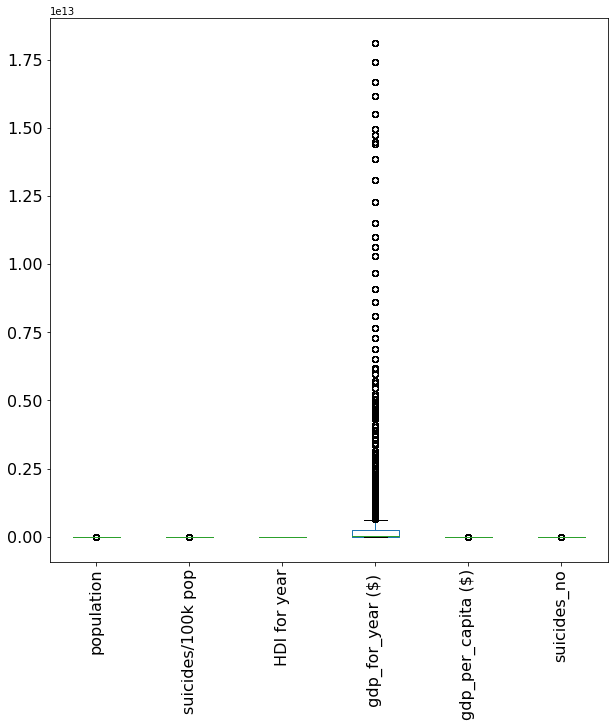

In [ ]:
df_Continuous.boxplot(grid = False, figsize = (10, 10), rot = 90, fontsize = 16)            # Boxplots for Dataframe with Continuous variables
plt.show()                                                                                  # Displaying the boxplot

## Histogram for Continuous Variables with few bins

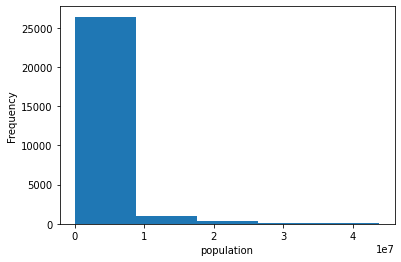

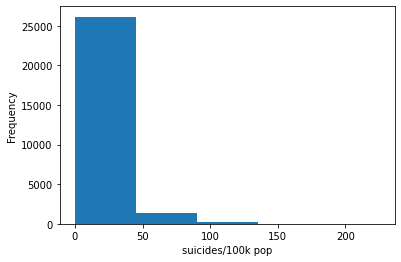

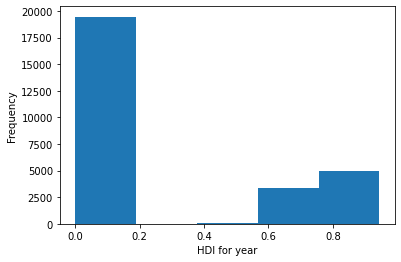

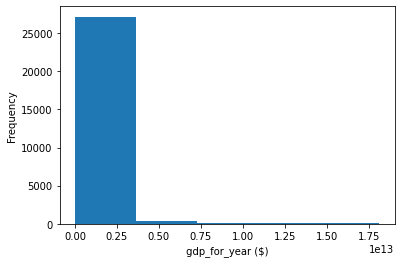

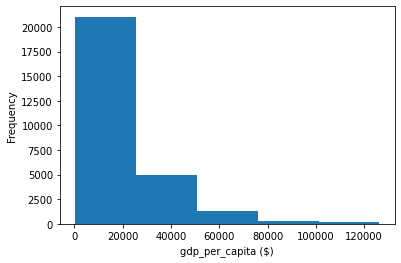

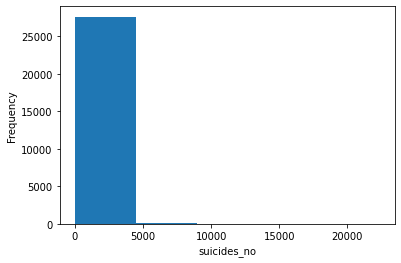

In [ ]:
N_few = 5                                       # variable for number of bins

for col in Continuous:
    plt.hist(df[col], bins=N_few)               # Histogram for particular columns and defined number of bins
    plt.xlabel(col)                             # displaying the xlabel and ylabels
    plt.ylabel('Frequency')
    plt.show()                                  # Displaying the histograms

## Histogram for Continuous Variables with many bins

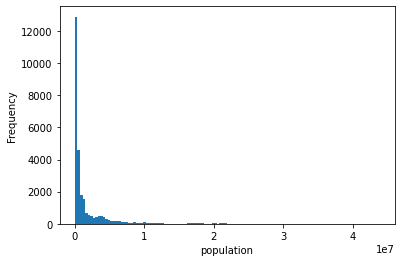

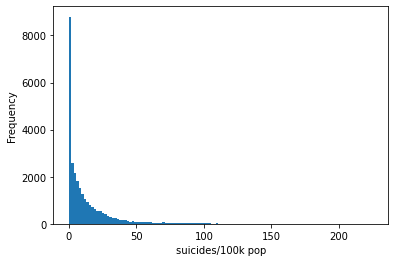

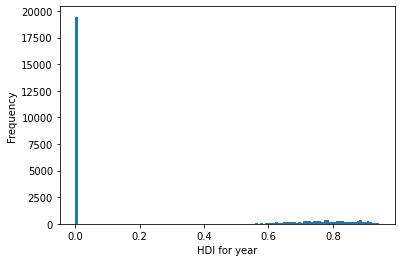

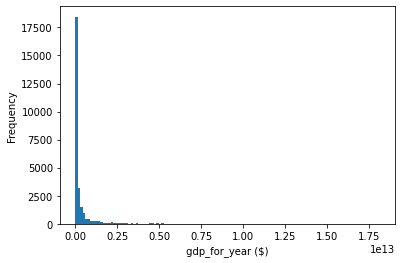

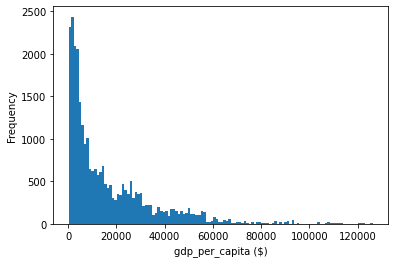

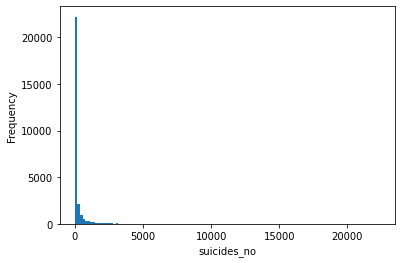

In [ ]:
N_many = 120                                        # variable for number of bins

for col in Continuous:
    plt.hist(df[col], bins=N_many)                  # Histogram for particular columns and defined number of bins
    plt.xlabel(col)                                 # displaying the xlabel and ylabels
    plt.ylabel('Frequency')
    plt.show()                                      # Displaying the histograms

## Histogram for Continuous Variables with correct number of bins

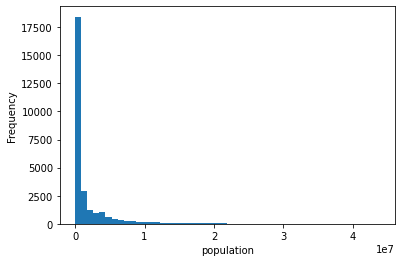

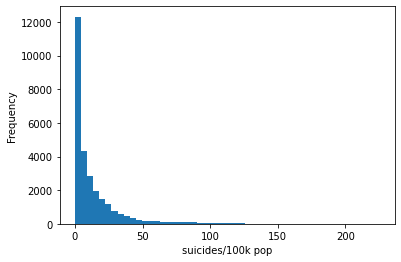

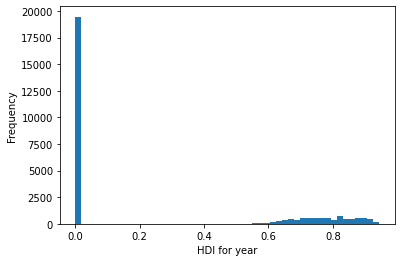

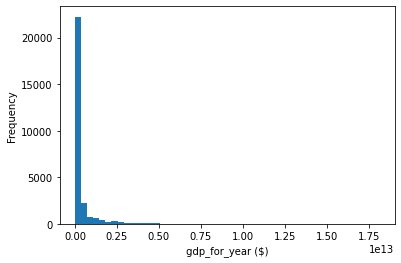

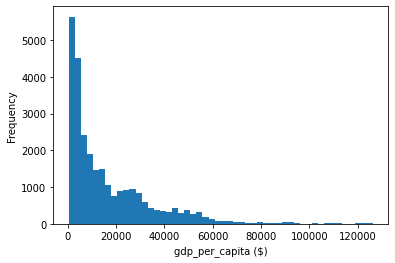

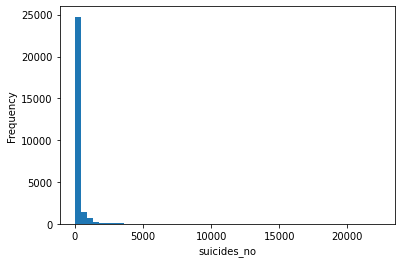

In [ ]:
N_good = 50                                 # variable for number of bins

for col in Continuous:
    plt.hist(df[col], bins=N_good)          # Histogram for particular columns and defined number of bins
    plt.xlabel(col)                         # displaying the xlabel and ylabels
    plt.ylabel('Frequency')
    plt.show()                              # Displaying the histograms

## Boxplots for all Continuous variables against Discrete Variable

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


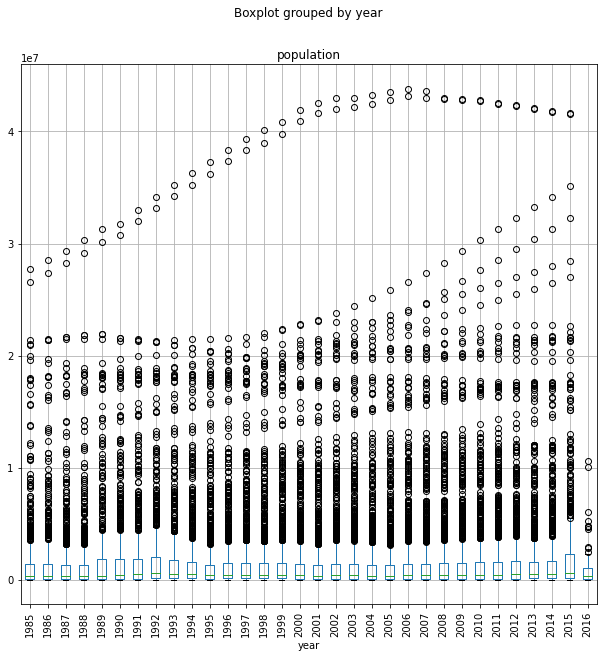

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


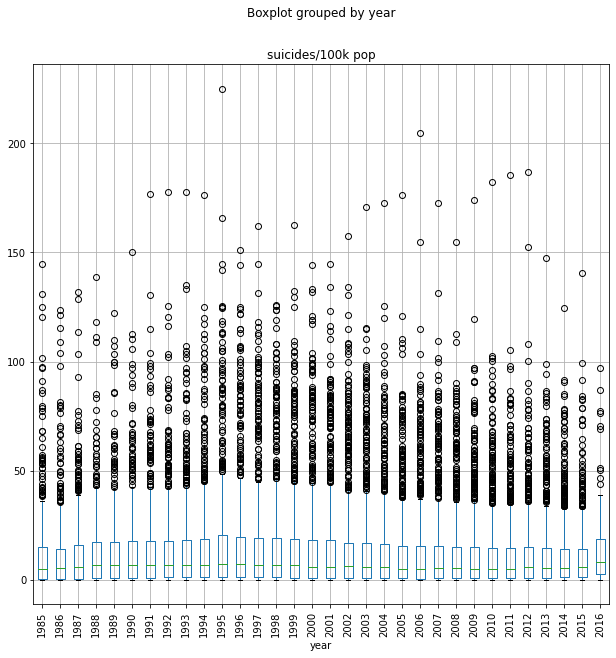

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


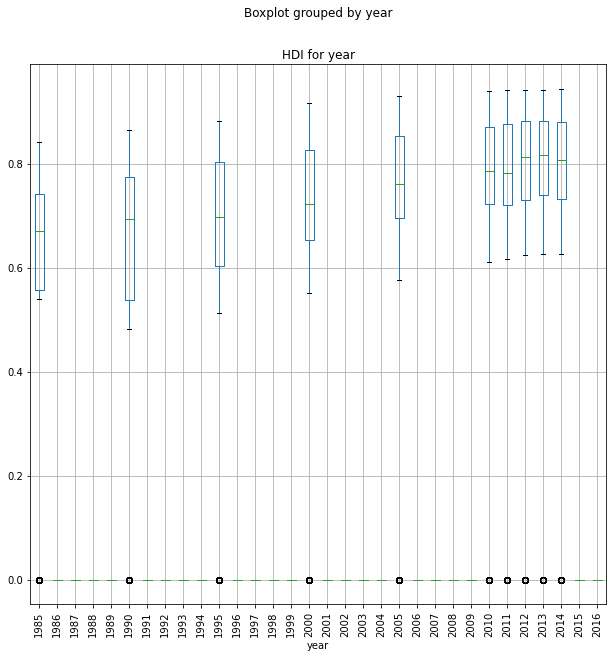

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


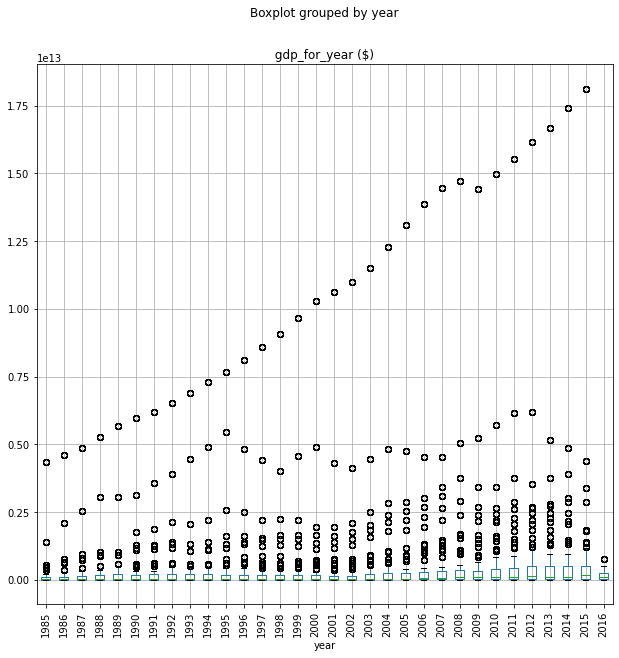

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


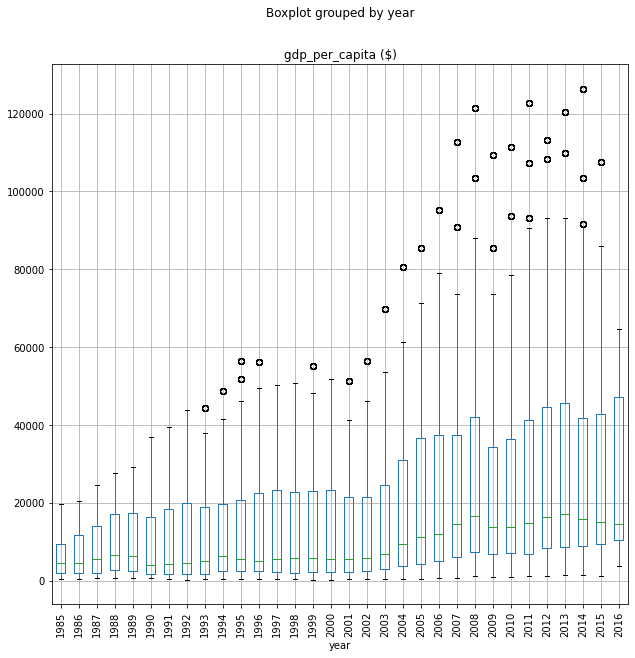

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


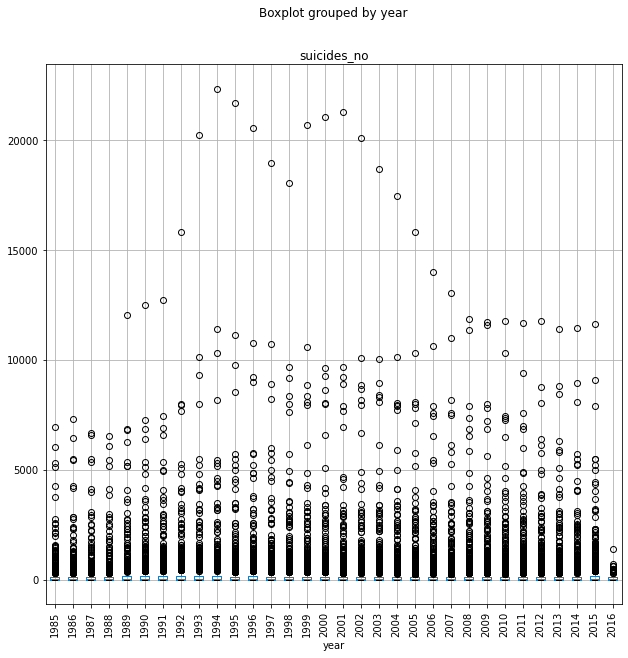

In [ ]:
for col in Continuous:
    df.boxplot(col, by='year',figsize=(10,10))                  # Boxplot for the given variable against the Discrete variable
    plt.xticks(rotation=90)                                     # Rotating xlabels for better readability
    plt.show()                                                  # Displaying the boxplots   

## Plotting Heatmap of Correlation for Continuous Variables

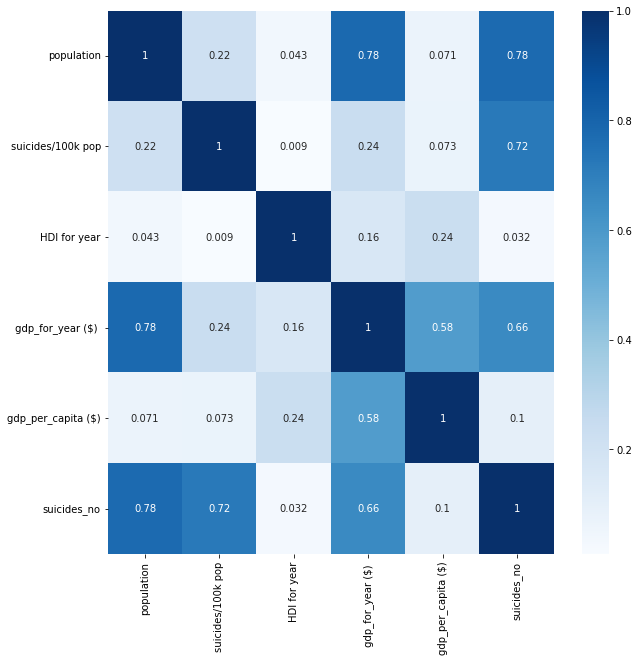

In [ ]:
correlation_Matrix = df_Continuous.corr(method = 'spearman')        # Correlation Matrix for all continuous columns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(correlation_Matrix), annot = True, cmap = 'Blues')          # Drawing the heatmap based on that correlation Matrix
plt.show()                                                              # Displaying the heatmap

## Displaying the suicides for every year of top 6 countries by highest average suicides

In [ ]:
Countries = df['country'].unique()                                  # Putting names of all countries in the list

Avg_Suicides_In_Countries = []                                      # A list to hold average suicides in all countries

for country in Countries:
    df_temp = df[df['country'] == country]                                  # Defining dataframe with data of a particular country
    years = df_temp['year'].unique()                                        # Finding the years for which data is available for that country
    Avg_Suicides_In_Countries.append(np.sum(df_temp['suicides_no'])/len(years))     # Finding the average suicides of the country and appending the result to the list

df_Suicides = pd.DataFrame()                                                        # defining datframe for suicides

df_Suicides['country'] = Countries                                                  # Adding column of country names
df_Suicides['Avg_Suicides'] = Avg_Suicides_In_Countries                             # Adding column of average suicides in a country


df_Suicides_Sorted = df_Suicides.sort_values(by='Avg_Suicides')                     # sorting the dataframe by average suicides

Countries_Sorted_Suicidewise = df_Suicides_Sorted['country'].to_list()              # reading the names of countries in a sorted order into a list

Most_Suicide_Countries = []                                                         # A list to hold names of top 6 countries by average suicides

for index in range(1,7):
    Most_Suicide_Countries.append(Countries_Sorted_Suicidewise[len(Countries) - index])         # Appending the names of last 6 countries in the list into the new list. we can do this because we sorted the dataframe before

for country in Most_Suicide_Countries:
    Yearwise_suicides = []                                                  # A list to hold yearwise suicides of a particular country
    df_temp = df[df['country'] == country]                                  # Defining dataframe with data of a particular country
    years = df_temp['year'].unique()                                        # Finding the years for which data is available for that country
    for year in years:
        df_temp1 = df_temp[df_temp['year'] == year]                         # Defining the dataframe which has data of a particular year of a country
        Yearwise_suicides.append(np.sum(df_temp1['suicides_no']))           # Appending the total number of suicides of a particular year of a country to the list of Yearwise_suicides 
    print('Yearwise Suicides of ' + country + ' are :-')                    # prining the name of country
    for index in range(0,len(years)):
        print(years[index], ': ', Yearwise_suicides[index])                 # Printing the results for all countries

Yearwise Suicides of Russian Federation are :-
1989 :  37921
1990 :  39028
1991 :  39281
1992 :  45923
1993 :  55846
1994 :  61420
1995 :  60548
1996 :  57511
1997 :  54746
1998 :  51518
1999 :  56974
2000 :  56619
2001 :  56958
2002 :  55024
2003 :  51445
2004 :  49096
2005 :  45802
2006 :  42614
2007 :  41149
2008 :  38211
2009 :  37408
2010 :  33356
2011 :  31038
2012 :  29643
2013 :  28690
2014 :  26541
2015 :  25432
Yearwise Suicides of United States are :-
1985 :  29446
1986 :  30892
1987 :  30783
1988 :  30388
1989 :  30218
1990 :  30895
1991 :  30790
1992 :  30471
1993 :  31084
1994 :  31123
1995 :  31272
1996 :  30879
1997 :  30517
1998 :  30558
1999 :  29183
2000 :  29343
2001 :  30607
2002 :  31645
2003 :  31477
2004 :  32428
2005 :  32629
2006 :  33292
2007 :  34596
2008 :  36030
2009 :  36900
2010 :  38362
2011 :  39508
2012 :  40596
2013 :  41143
2014 :  42769
2015 :  44189
Yearwise Suicides of Japan are :-
1985 :  23257
1986 :  25484
1987 :  23663
1988 :  22676
1989 :  2

## Defining a Matrix which has age-groupwise data for plotting

In [ ]:
Age_Groups = df['age'].unique()                             # A list which has all Age Groups available in data

Suicide_Matrix = []                                         # Defining a list to hold values in a matrix form
for country in Most_Suicide_Countries:
    Suicide_Column_Agewise  = []                            # A list to hold values of a column of the main Suicide Matrix
    df_temp = df[df['country'] == country]                  # Defining dataframe with data of a particular country
    Age_Groups = df_temp['age'].unique()                    # A list which has all Age Groups available in data
    for age in Age_Groups:
        df_temp1 = df_temp[df_temp['age'] == age]           # defining a dataframe which has age-groupwise information of a particular country
        Suicide_Column_Agewise.append(np.sum(df_temp1['suicides_no']))      # Appending the number of suicides to the column of the country
    Suicide_Matrix.append(Suicide_Column_Agewise)                           # Appending the list for a country to the main 2D matrix 

## Bar plot for mix of age groups for top 6 countries

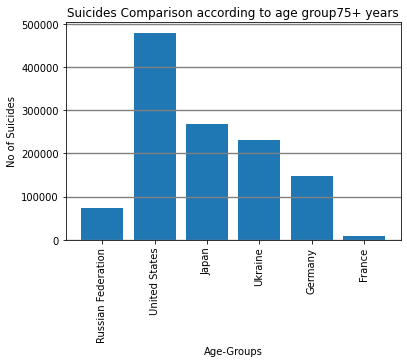

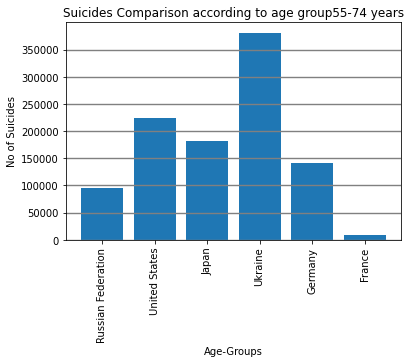

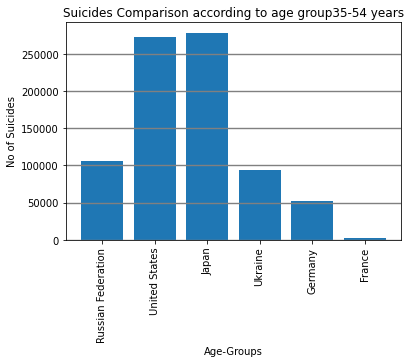

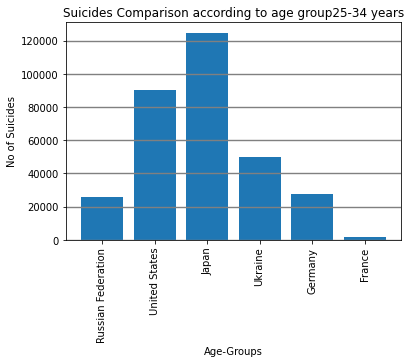

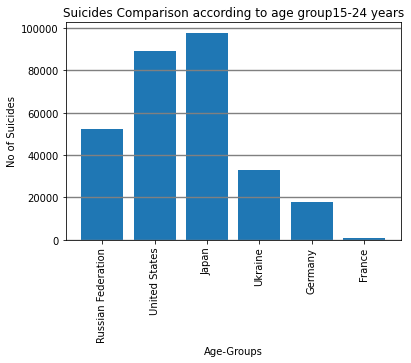

In [ ]:
for rank in range(0,5):                             # plotting barplots for the top 6 countries
    fig = plt.figure()
    plt.grid(True, axis='y', color = 'grey', linewidth = '1.4', linestyle = 'solid')            # Drawing Grid Lines
    plt.bar(Most_Suicide_Countries, Suicide_Matrix[0:5][rank])                      # Creating bar-plot for a particular Age_group                                  
    plt.xlabel('Age-Groups')                                                        # Defining the xlabel
    plt.ylabel('No of Suicides')                                                    # Defining the ylabels
    plt.title('Suicides Comparison according to age group' + str(Age_Groups[rank]))            # Defining the title for the plot
    plt.xticks(rotation=90)                                                         # rotating the values on x-axis by 90 degrees for better readability
    plt.show()                                                                      # Displaying the plot one by one

## Agewise Suicide data for males and females

In [ ]:
df_female = pd.DataFrame()                                  
female_Suicides_Agewise = []                                # a list to hold agewise female suicides

df_female = df[df['sex'] == 'female']                       # Dataframe for data of females
for age in Age_Groups:
    df_temp = df_female[df_female['age'] == age]            # Defining a temporary dataframe for every age-group of females
    female_Suicides_Agewise.append(np.sum(df_temp['suicides_no']))              # Appending the total number of suicides for that age-group of all years to the list


df_male = pd.DataFrame()
male_Suicides_Agewise = []                                  # a list to hold agewise female suicides

df_male = df[df['sex'] == 'male']                           # Dataframe for data of females
for age in Age_Groups:
    df_temp = df_male[df_male['age'] == age]                # Defining a temporary dataframe for every age-group of females
    male_Suicides_Agewise.append(np.sum(df_temp['suicides_no']))            # Appending the total number of suicides for that age-group of all years to the list

## Boxplot for age-wise male and female Comparison

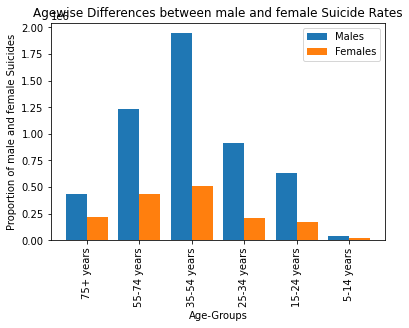

In [ ]:
X_axis = np.arange(len(Age_Groups))                                     # arranging x-axis according to length of age-groups

plt.bar(X_axis-0.2, male_Suicides_Agewise, 0.4,label = 'Males')         # bar plot for males

plt.bar(X_axis+0.2, female_Suicides_Agewise, 0.4,label = 'Females')     # bar plot for females

plt.xticks(X_axis, Age_Groups, rotation = 90)                           # Rotating the values on x-axis for better readability

plt.xlabel('Age-Groups')                                                # defining xlabels

plt.ylabel('Proportion of male and female Suicides')                    # defining ylabels

plt.title('Agewise Differences between male and female Suicide Rates')              # defining the title for the joint bar plots

plt.legend()                                                            # Defining legend of the plot

plt.show()                                                              # Displaying the overall plot

## Yearwise Suicide data for males and females

In [ ]:
years = df['year'].unique()

female_Suicides_Yearwise = []                                               # a list to hold yearwise female suicides

for year in years:
    df_temp = df_female[df_female['year'] == year]                          # Defining a temporary dataframe for every year for females
    female_Suicides_Yearwise.append(np.sum(df_temp['suicides_no']))             # Appending the total number of suicides for that year of all age-groups to the list


male_Suicides_Yearwise = []                                                  # a list to hold yearwise male suicides

for year in years:
    df_temp = df_male[df_male['year'] == year]                               # Defining a temporary dataframe for every year for males
    male_Suicides_Yearwise.append(np.sum(df_temp['suicides_no']))            # Appending the total number of suicides for that year of all age-groups to the list

## Boxplot for year-wise male and female Comparison

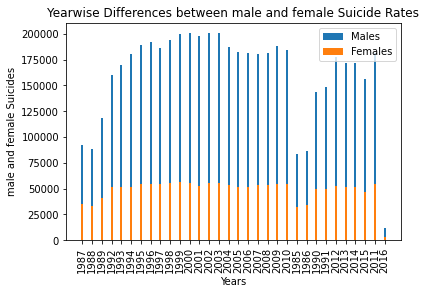

In [ ]:
X_axis = np.arange(len(years))                                                  # arranging x-axis according to length of age-groups

plt.bar(X_axis, male_Suicides_Yearwise, 0.2, label = 'Males')                   # bar plot for males

plt.bar(X_axis, female_Suicides_Yearwise, 0.2, label = 'Females')               # bar plot for females

plt.xticks(X_axis, years, rotation = 90)                                        # Rotating the values on x-axis for better readability

plt.xlabel('Years')                                                             # defining xlabels

plt.ylabel('male and female Suicides')                                          # defining ylabels

plt.title('Yearwise Differences between male and female Suicide Rates')                 # defining the title for the joint bar plots

plt.legend()                                                                    # Defining legend of the plot

plt.show()                                                                      # Displaying the overall plot

#### From the Above two analysis, it is evident that for all years the male suicides are more than the female suicides. Also it is clear that for every age-group also the number of male suicides are more than the number of female suicides

## Barplots to decide the worst year for all generations of US

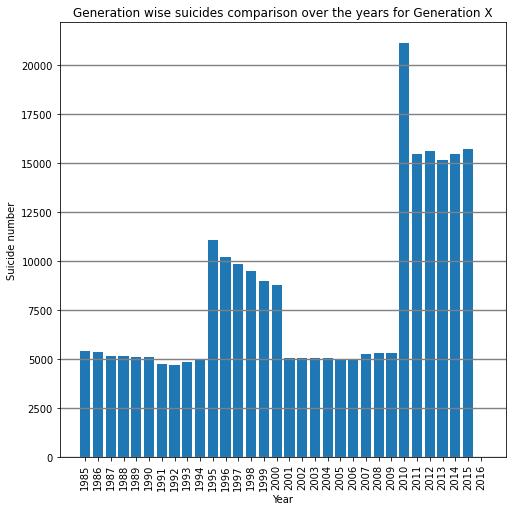

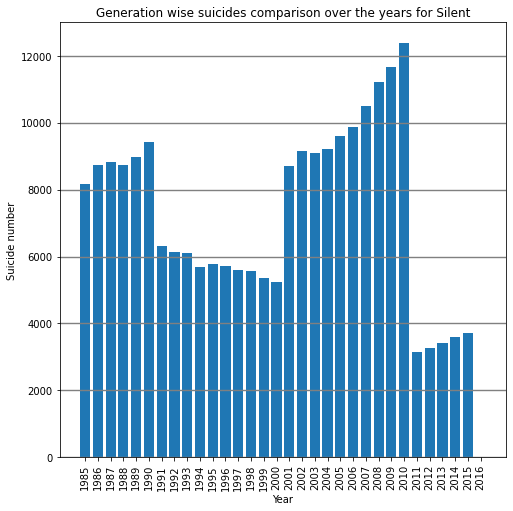

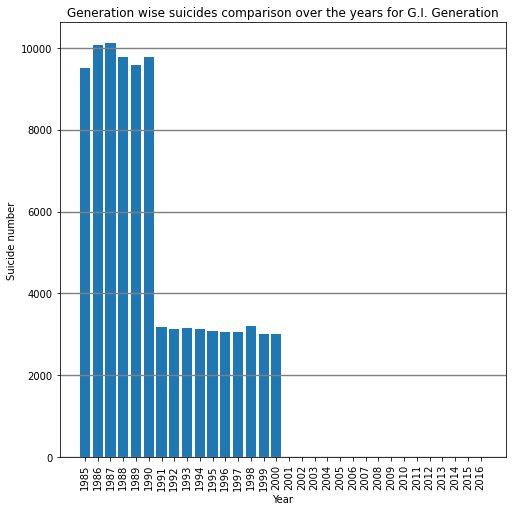

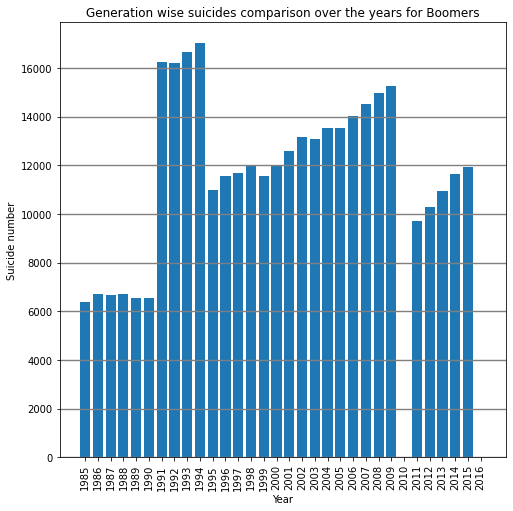

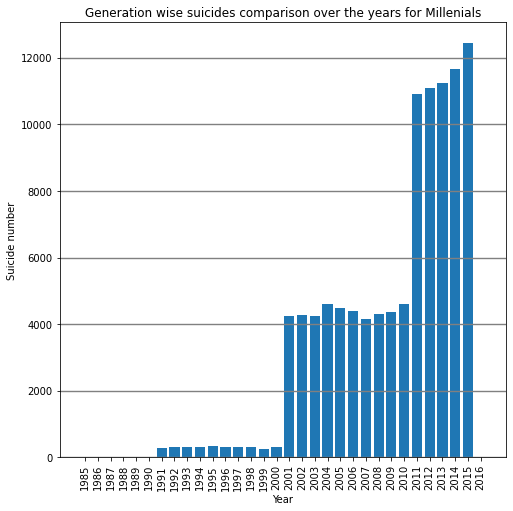

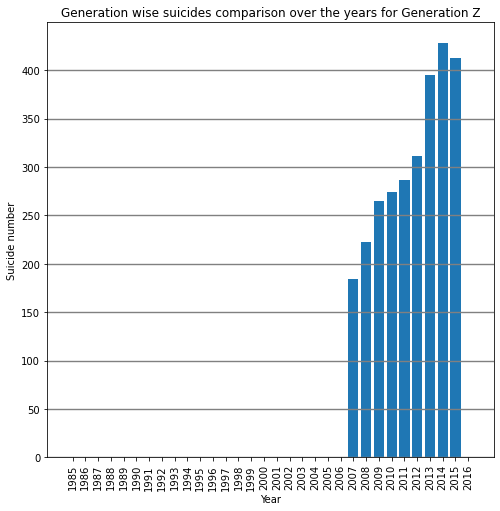

In [ ]:
# Defining some basic required dataframes and lists which will be used by generation-wise comparison of suicide rates for united states
df_US = df[df['country'] == 'United States']                                                    # Dataframe to hold data of US
generation = df['generation'].unique()                                                          # A list which holds names of generations
years = sorted(df['year'].unique())                                                             # A list which holds all years of US dataframe
generationwise_suicide_list = []                                                                # A list to hold generationwise suicides

# Plotting bar plots for different generations over the years
for gen in generation:
    df_temp = df_US[df_US['generation'] == gen]
    for year in years:
        df_temp1 = df_temp[df_temp['year'] == year]
        generationwise_suicide_list.append(np.sum(df_temp1['suicides_no']))
    plt.figure(figsize = (8,8))                                                             # Defining the figure
    plt.grid(True, axis = 'y', color = "grey", linewidth = "1.4", linestyle = 'solid')      # Drawing the grid lines
    plt.bar(years, generationwise_suicide_list)                                             # Bar plot for worst year for a particular age-group
    plt.xlabel('Year')                                                                      # writing the x-label for barplots
    plt.ylabel('Suicide number')                                                            # writing the y-label for barplots
    plt.xticks(years, rotation = 90)                                                        # Rotating the values on x-axis for better readability
    plt.title('Generation wise suicides comparison over the years for '+ str(gen))          # Defining the title for barplots
    plt.show()                                                                              # Displaying the plots
    generationwise_suicide_list.clear()  

### From the above bar graphs, we can conclude the worst year for every generation
#### Worst years are listed as follows:
1. Generation X - 2010
2. Silent - 2010
3. GI Generation - 1987
4. BOomers - 1994
5. Millenials - 2015
6. Generation Z - 2014

## Bihistogram for Males and Females of top 6 Countries by average Suicides

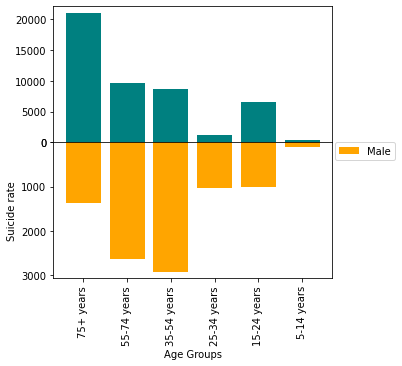

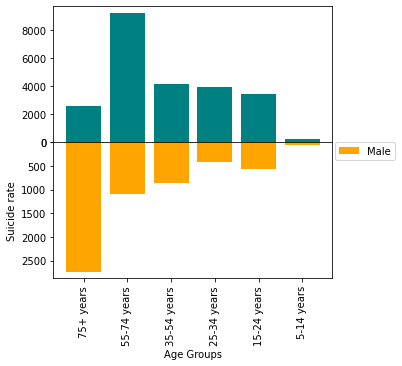

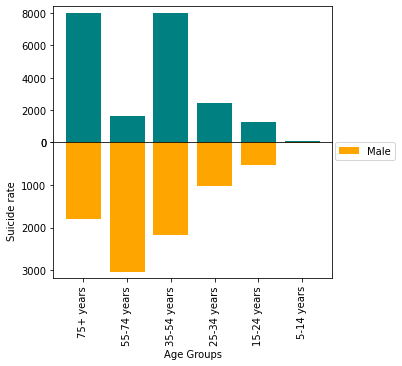

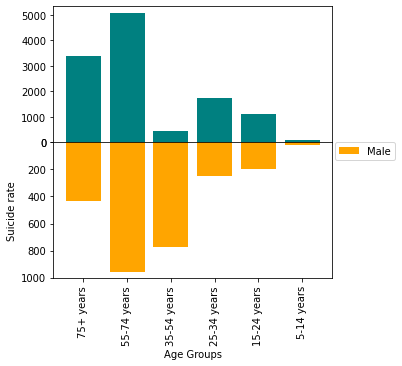

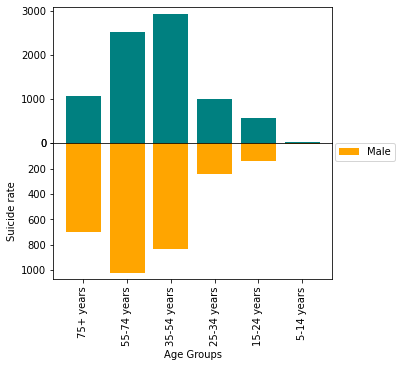

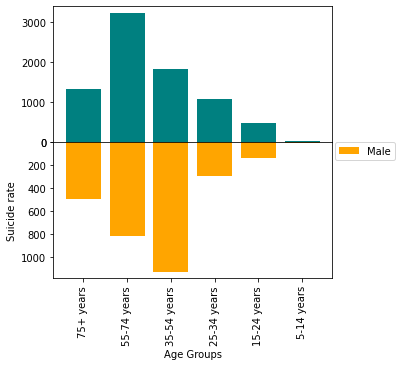

In [ ]:
for country in Most_Suicide_Countries:
    df_male_2000 = df_male[df_male['year'] == 2000]                                     # Dataframe to store data of males in year 2000
    df_male_Country_2000 = df_male_2000[df_male_2000['country'] == country]               # Dataframe to store data of males of Japan in year 2000
    male_Suicides_Country = df_male_Country_2000['suicides_no'].to_list()                   # Converting the column of number of suicides in the previous dataframe to a list


    df_female_2000 = df_female[df_female['year'] == 2000]                               # Dataframe to store data of females in year 2000
    df_female_Country_2000 = df_female_2000[df_female_2000['country'] == country]         # Dataframe to store data of females of Japan in year 2000
    female_Suicides_Country = df_female_Country_2000['suicides_no'].to_list()               # Converting the column of number of suicides in the previous dataframe to a list


    Genders =['Male', 'Female']                                                         # A list which holds the Gender names

    Country_2000 = pd.DataFrame(list(zip(male_Suicides_Country, female_Suicides_Country)), columns =['Male', 'Female'])       # Dataframe made using the 2 previously defined lists and proper column names


    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))              # Plotting two genders on the same plot using subplots which has 2 rows for 2 genders shown with different colors, 1 column per entry, same values along x-axis and the given figure size        

    for ax, column, color, invert in zip(axes.ravel(), Country_2000.columns, ['teal', 'orange'],  [False,True]):              #Plotting two bar graphs on same x-axis for males and females where the barplot of males has an inverted y-axis
        ax.bar(Age_Groups, Country_2000[column], color=color)                             # Plotting barplot for a particular gender based on conditions
        if invert:
            ax.invert_yaxis()                                                           # Inverting the barplot of first gender in the list of gender names
            
    plt.subplots_adjust(hspace=0)                                                   # Adjusting the two subplots of genders to align vertically
    plt.xlabel('Age Groups')                                                        # defining xlabels
    plt.ylabel('Suicide rate')                                                      # defining ylabels
    plt.xticks(Age_Groups, rotation = 90)                                           # using xticks() function to increase the readability by rotating xlabels by 90 degrees
    plt.legend(labels=Genders, bbox_to_anchor=(1.01, 1), borderaxespad=0)           # Defining the legend to let the reader know which bar plot is of which gender
    plt.show()                                                                      # Displaying the results

## Bubble Plot to show relation between Suicides, HDI and Population

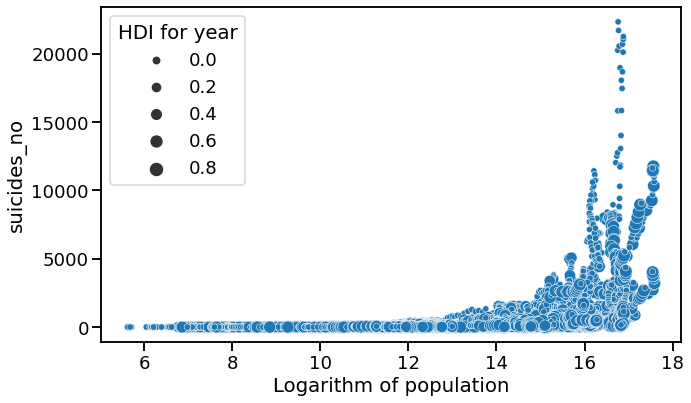

In [ ]:
df_Bubble = pd.DataFrame()                                              # Creating a Dataframe

df_Bubble['suicides_no'] = df['suicides_no']                            # copying the values of columns 'suicides_no', 'HDI for year', 'population' of original dataframe into the new Dataframe

df_Bubble['HDI for year'] = df['HDI for year']

df_Bubble['Logarithm of population'] = np.log(df['population'])

sns.set_context("talk", font_scale=1.1)                                 # sns.set_context() used to affect the context of the scatteplot and also to change the default fontsize           
plt.figure(figsize=(10, 6))                                             # Creating a figure with the defined figuresize
sns.scatterplot(x='Logarithm of population',                                         # Plotting the Scatterplot using the seaborn library of particular columns of the dataframe
                y='suicides_no',
                size='HDI for year',
                data=df_Bubble)
plt.tight_layout()                                                      # Used to adjust the padding between and around subplots for asthetic effects
plt.show()                                                              # Displaying the final results

#plt.scatter(np.log(df_Bubble['population']), df_Bubble['suicides_no'], s=df_Bubble['HDI for year'])

#plt.show()

## References

1.   [Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
2.   [Pandas Tutorial of GeeksforGeeks](https://www.geeksforgeeks.org/pandas-tutorial/)

3.   [Matplotlib Tutorial for GeeksforGeeks](https://www.geeksforgeeks.org/matplotlib-tutorial/)
4. [Scipy Documentation](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide)
5.   Stackoverflow
6.   Reference .ipynb notebooks provided by sir
*   T4_EDA
*   ML_FOR_SMART_MONKEYS